In [1]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup as bsoup
from thefuzz import fuzz

from typing import Any, List, Dict, Tuple, Optional

import constants, index_tools, data_tools

from utilities import *

if is_jupyter_notebook():
    from tqdm.notebook import tqdm
else:
    from tqdm import tqdm

# Data Index

In [26]:
biobank_index_full = index_tools.load_index()

In [27]:
biobank_index_full = index_tools.add_udi_names_to_index(biobank_index_full)
udi_map = index_tools.UDIMap(biobank_index_full)

# Load BioBank Data

In [32]:
biobank_data_full = data_tools.load_biobank_data(constants.UK_BIOBANK_DATA_CSV_PATH, udi_map)
biobank_index_full = index_tools.add_biobank_info_to_index(biobank_index_full, biobank_data_full)
display(biobank_data_full.head())

UK BioBank Data Loaded.
Size: 9999 rows x 2781 columns


,eid,verbal_interview_duration,verbal_interview_duration_1.0,verbal_interview_duration_2.0,sex,birth_year,bp_device,bp_device_1.0,bp_device_2.0,bp_manual_device_ID,...,operative_procedures_OPCS4_secondary_0.82,operative_procedures_OPCS4_secondary_0.83,operative_procedures_OPCS4_secondary_0.84,operative_procedures_OPCS4_secondary_0.85,important_unlabeled_34,inpatient_record_format,inpatient_record_format_0.1,inpatient_record_format_0.2,inpatient_record_format_0.3,inpatient_record_format_0.4
0,1000013,485.0,NaN,NaN,1,1962,2817.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,18.0,NaN,NaN,NaN,NaN
1,1000024,328.0,NaN,NaN,0,1941,1054.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN,NaN
2,1000036,364.0,NaN,NaN,0,1955,3159.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,6.0,NaN,NaN,NaN,NaN
3,1000048,322.0,NaN,NaN,1,1941,3780.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,18.0,NaN,NaN,NaN,NaN
4,1000055,477.0,NaN,NaN,0,1947,3156.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,6.0,18.0,NaN,NaN,NaN


In [33]:
udi_map.get_udi("antibiotic_n_taken_past_3_months")

'antibiotic_n_taken_past_3_months'

In [34]:
biobank_index_full.loc[biobank_index_full["udi"].apply(lambda s: s.startswith("6671"))]

,column,udi,count,type,description,data_code,name,counts,frequency
901,901,6671-2.0,20474,Integer,Number of antibiotics taken in last 3 months,None,None,411,0.041104


In [35]:
biobank_index_full.loc[biobank_index_full["name"].isna()]

,column,udi,count,type,description,data_code,name,counts,frequency
901,901,6671-2.0,20474,Integer,Number of antibiotics taken in last 3 months,None,None,411,0.041104
1759,1759,20199-2.0,1333,Categorical (multiple),Antibiotic codes for last 3 months,744,None,34,0.003400
1760,1760,20199-2.1,96,Categorical (multiple),Antibiotic codes for last 3 months,744,None,3,0.000300
1761,1761,20199-2.2,14,Categorical (multiple),Antibiotic codes for last 3 months,744,None,1,0.000100
1762,1762,20199-2.3,2,Categorical (multiple),Antibiotic codes for last 3 months,744,None,0,0.000000


# Identify Missing UDIs and create UDI lookup table to fill out

In [36]:
missing_name_index = index_tools.get_indices_missing_names(biobank_index_full)

In [37]:
missing_name_index.to_csv("test.csv", index=False)

In [38]:
biobank_index_full["name"].isna().mean()

0.0017979144192736426

# Clean + Reduce feature set

In [46]:
biobank_data = data_tools.clean_biobank_data(biobank_data_full)

reduced_feature_set = data_tools.create_reduced_feature_set(biobank_data)


biobank_index = biobank_index_full.loc[biobank_index_full["name"].isin(reduced_feature_set)].reset_index(drop=True)
biobank_data = biobank_data_full[reduced_feature_set]

# BioBank Code Download

In [47]:
index_tools.download_biobank_code_data(code=3, overwrite=False)

code 3 files already exist.


In [48]:
index_tools.download_all_biobank_codes(biobank_index);

code 1 files already exist.
code 10 files already exist.
code 1001 files already exist.
code 1002 files already exist.
code 100258 files already exist.
code 100259 files already exist.
code 100264 files already exist.
code 100267 files already exist.
code 100286 files already exist.
code 100291 files already exist.
code 100292 files already exist.
code 100294 files already exist.
code 100295 files already exist.
code 100298 files already exist.
code 100299 files already exist.
code 100300 files already exist.
code 100301 files already exist.
code 100347 files already exist.
code 100348 files already exist.
code 100349 files already exist.
code 100351 files already exist.
code 100352 files already exist.
code 100353 files already exist.
code 100355 files already exist.
code 100356 files already exist.
code 100357 files already exist.
code 100358 files already exist.
code 100359 files already exist.
code 100360 files already exist.
code 100361 files already exist.
code 100369 files alrea

# Feature Exploration

In [11]:
feature_data = {"feature": [], "feature_samples": [], "n_unique": []}

for column in tqdm(biobank_data.columns, desc="Analyzing features", unit=" feature"):
    unique_features = biobank_data[column].unique()
    feature_data["feature_samples"].append(np.random.choice(unique_features, min(5, len(unique_features))))
    feature_data["feature"].append(column)
    feature_data["n_unique"].append(len(unique_features))
    
feature_data = pd.DataFrame(feature_data)

Analyzing features:   0%|          | 0/370 [00:00<?, ? feature/s]

In [12]:
UK_BIOBANK_FEATURE_VALUE_REMAPPING = {
    "sex": ["female", "male"]
}

# Feature Index EDA

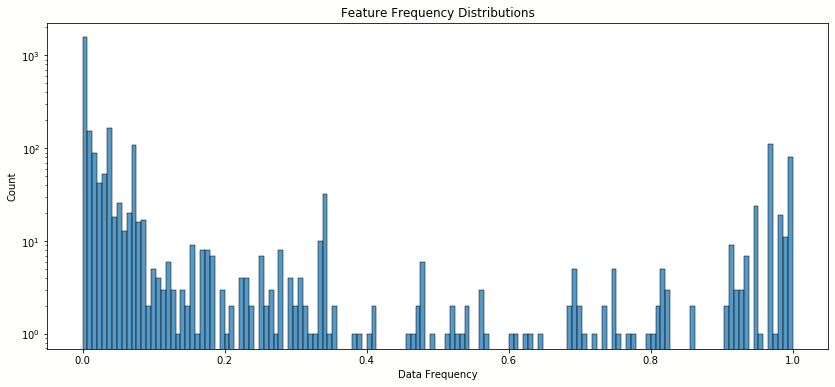

In [13]:
fig, ax = plt.subplots(figsize=(14, 6), facecolor="#fffffe")
sns.histplot(biobank_index_full["frequency"], ax=ax)
ax.set_yscale("log")
add_plt_labels(ax, "Data Frequency", "Count", "Feature Frequency Distributions")
plt.show()
fig.tight_layout()
fig.savefig(constants.COVER_PLOTS_GENERIC_FILE_PATH.format("feature_frequency_distribution.png"), facecolor="#fffffe")

# actual EDA

In [14]:
cancer_biobank = biobank_data.loc[~biobank_data["cancer_code"].isna()]

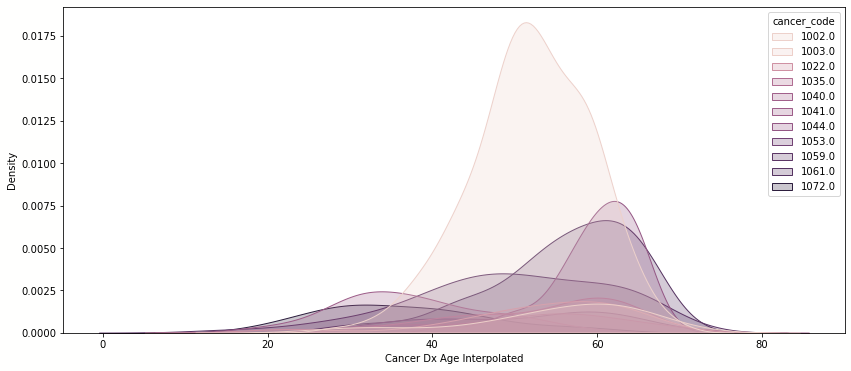

In [15]:
cancer_codes, counts = np.unique(cancer_biobank["cancer_code"], return_counts=True)

common_cancer_codes = cancer_codes[counts > 20]
common_cancer_biobank = cancer_biobank.loc[cancer_biobank["cancer_code"].isin(common_cancer_codes)]


fig, ax = plt.subplots(figsize=(14, 6), facecolor="#fffffe")
sns.kdeplot(data=common_cancer_biobank, x="cancer_dx_age_interpolated", hue="cancer_code", ax=ax, shade=True)
add_plt_labels(ax, "cancer_dx_age_interpolated", "Density")
fig.savefig(constants.COVER_PLOTS_GENERIC_FILE_PATH.format("cancer_onset_age.png"), facecolor="#fffffe")

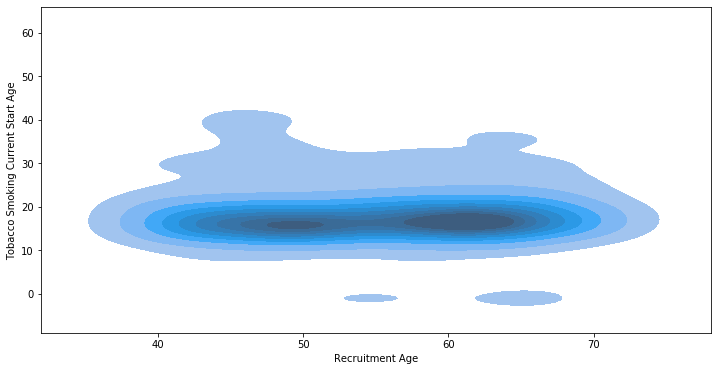

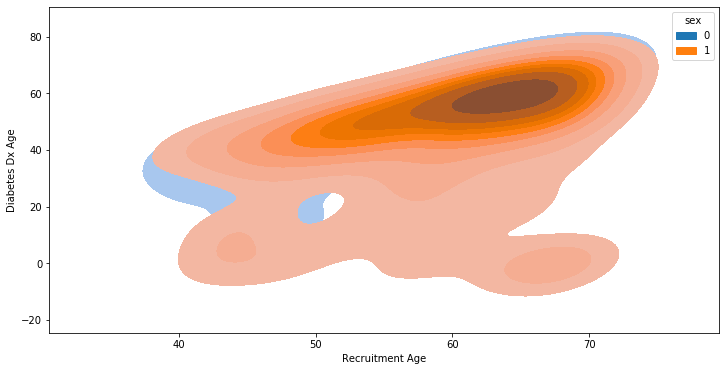

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
y = "tobacco_smoking_current_start_age"
x = "recruitment_age"

sns.kdeplot(data=biobank_data, y=y, x=x, ax=ax, fill=True)
add_plt_labels(ax, x, y)

y, x = "diabetes_dx_age", "recruitment_age"
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=biobank_data, x=x, y=y, hue="sex", ax=ax, fill=True)
add_plt_labels(ax, x, y)

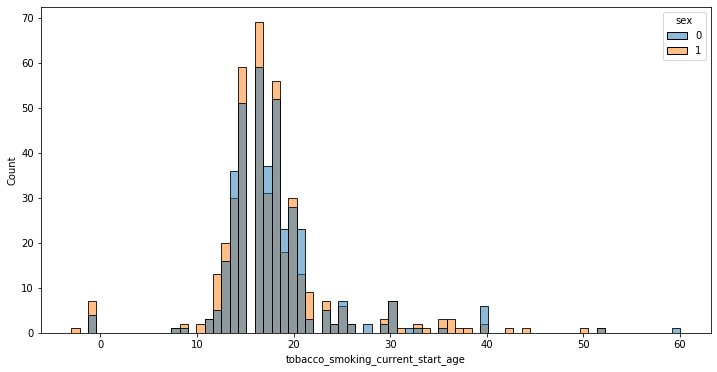

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=biobank_data, x="tobacco_smoking_current_start_age", hue="sex",  ax=ax)

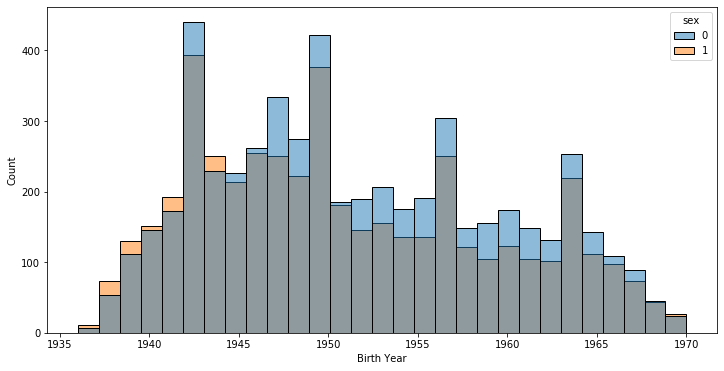

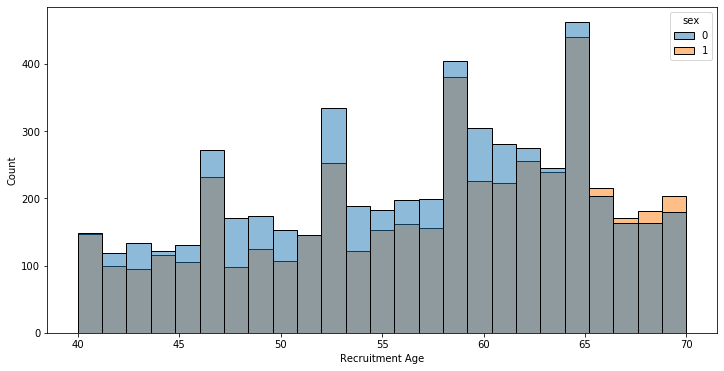

In [18]:
x, hue = "birth_year", "sex"
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=biobank_data, x=x, hue=hue, ax=ax)
add_plt_labels(ax, x, y="Count")

x = "recruitment_age"
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=biobank_data, x=x, hue=hue, ax=ax)
add_plt_labels(ax, x, y="Count")